In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = 'https://raw.githubusercontent.com/dan1dr/microdosing/main/data/wide.csv'
data = pd.read_csv('./wide.csv', sep=',', index_col=0)
pd.options.display.max_columns = None

In [11]:
data.head()

,ResponseId,StartDate,EndDate,RecordedDate,Angry,Distressed,Afraid,Frustrated,Nervous,Alarmed,Tense,Annoyed,Astonished,Excited,Alert,Delighted,Amused,Glad,Happy,Pleased,Sad,Miserable,Depressed,Droopy,Gloomy,Fatigued,Bored,Tired,Serene,Content,Calm,At ease,Satisfied,Relaxed,Sleepy,Quiet,Current,Reddit,Country,Age,Gender,Orientation,Ethnicity,Ethnicity_11_TEXT,Religion,Religion_12_TEXT,Religiosity,Spirituality,Education,SES,AgeMD,Substance_1,Substance_2,Substance_8,Dose_1,Dose_4,Dose_2,Dose_3,Dose_7,Dose_8,Spacing,DoseNumber,Money,Money_1_TEXT,Money_2_TEXT,Money_3_TEXT,Money_5_TEXT,Money_6_TEXT,Friends,Recommend,Pro_1,Pro_1_TEXT,Pro_2,Pro_2_TEXT,Pro_3,Pro_3_TEXT,Con_1,Con_1_TEXT,Con_2,Con_2_TEXT,Con_3,Con_3_TEXT,ImpSleep,ImpEating,ImpExercise,ImpMeditative,ImpMood,ImpAnxiety,RedAlcohol,RedTobacco,RedCaffeine,RedCannabis,RedOther_illicit,RedPsychiatric,OverallHealth,DrugRecreational_1,DrugRecreational_2,DrugRecreational_3,DrugRecreational_4,DrugRecreational_5,DrugRecreational_6,DrugRecreational_7,DrugRecreational_8,DrugRecreational_9,DrugRecreational_10,DrugRecreational_11,DrugRecreational_12,DrugRecreational_13,DrugRecreationalMD,Diagnoses_2,Diagnoses_3,Diagnoses_4,Diagnoses_5,Diagnoses_18,Diagnoses_14,Diagnoses_7,Diagnoses_8,Diagnoses_15,Diagnoses_16,Diagnoses_10,DrugRXCurrent,DrugRXCurrent_1_TEXT,DrugRXMD,DrugRXMD_1_TEXT,BFI.2_63,BFI.2_64,BFI.2_65,BFI.2_66,BFI.2_67,BFI.2_68,BFI.2_69,BFI.2_70,BFI.2_71,BFI.2_72,BFI.2_73,BFI.2_74,BFI.2_75,BFI.2_76,BFI.2_77,BFI.2_78,BFI.2_79,BFI.2_80,BFI.2_81,BFI.2_82,BFI.2_83,BFI.2_84,BFI.2_85,BFI.2_86,BWSS_28,BWSS_29,BWSS_30,BWSS_31,BWSS_32,BWSS_33,BWSS_34,BWSS_35,BWSS_36,BWSS_37,BWSS_38,BWSS_39,BWSS_40,BWSS_41,BWSS_42,BWSS_43,BWSS_44,BWSS_45,BWSS_46,BWSS_47,BWSS_48,DAS.A.17_87,DAS.A.17_88,DAS.A.17_89,DAS.A.17_90,DAS.A.17_91,DAS.A.17_92,DAS.A.17_93,DAS.A.17_94,DAS.A.17_95,DAS.A.17_96,DAS.A.17_97,DAS.A.17_98,DAS.A.17_99,DAS.A.17_100,DAS.A.17_101,DAS.A.17_102,DAS.A.17_103,DebreifWithdraw,Substance_8_TEXT...Topics,Ethnicity_11_TEXT...Topics,Religion_12_TEXT...Topics,Dose_1_TEXT...Topics,Dose_2_TEXT...Topics,Dose_4_TEXT...Topics,Occupation...Topics,DrugRXCurrent_1_TEXT...Topics,Reddit_5_TEXT...Topics,DrugRXMD_1_TEXT...Topics,DrugRecreationalMD_1_TEXT...Topics,Con_1_TEXT...Topics,Con_2_TEXT...Topics,Con_3_TEXT...Topics,MD,LogDoseNumber,TB,TBt,Con_1_TEXT...TopicsXT,Pro,Con,Diagnosis,FD,Polydrug,Mood.Valence,Mood.Intensity,NegEmo,NegEmo_Anx,NegEmo_Dep,NegEmo_EVo,OpenMind,OpenMind_Aes,OpenMind_Int,OpenMind_CrI,BWSS,DAS,DAS_Pft,DAS_Dep,Con_1_Code,Con_2_Code,Con_3_Code,ProIndex,ProCode,ResponseId.1,Rating.P,ProRating,ResponseId.2,ConIndex,ConCode,Rating.C,ConRating,ProConcept,ProCategory,ConConcept,ConCategory,ProCode1,ProCategory1,ProRating1,ConCode1,ConCategory1,ConRating1,ProCode2,ProCategory2,ProRating2,ConCode2,ConCategory2,ConRating2,ProCode3,ProCategory3,ProRating3,ConCode3,ConCategory3,ConRating3
0,R_0HSeYpblz5LCLpD,19/09/2017 18:27,19/09/2017 18:51,19/09/2017 18:51,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,5,187,21,-1.0,-1.0,1,-99,1,-99,2,20,6.0,1.0,20,1,-99,-99,-99,1,-99,-99,-99,-99,3,25.0,1,5,-99,-99,-99,-99,0,2,85,Self-Reflection,90.0,Changing internal beliefs,55.0,Habit-Training,25.0,Worse night of sleep,4.0,Illegal,20.0,"I'm on a ""drug""",0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,83.0,2.0,4.0,2.0,1.0,1.0,4.0,4.0,3.0,4.0,4.0,1.0,1.0,4.0,NaN,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,4.0,-99,NaN,NaN,50.0,29.0,43.0,100.0,14.0,91.0,100.0,72.0,61.0,100.0,28.0,73.0,90.0,35.0,76.0,97.0,47.0,91.0,80.0,30.0,72.0,96.0,0.0,93.0,94.0,41.0,66.0,44.0,90.0,77.0,60.0,71.0,84.0,26.0,38.0,81.0,33.0,43.0,61.0,37.0,100.0,17.0,8.0,19.0,95.0,18.0,85.0,58.0,89.0,88.0,57.0,59.0,57.0,59.0,85.0,82.0,35.0,80.0,50.0,72.0,56.0,82.0,1.0,NaN,NaN,NaN,NaN,NaN,12.0,Student,NaN,/r/RationalPsychonaut,NaN,NaN,Sleep Disturbances,Illegality,Stigma,1,3.218876,1,1,NaN,76.666667,16.333333,0.0,1.0,21.0,-9,3,55.083333,80.00,63.00,22.25,75.583333,41.50,98.25,87.0,56.428571,83.72,55.22

In [4]:
print(f"The number of participants were: {data['ResponseId'].nunique()}")

The number of participants were: 278


**Mood board.**
The scale consists of a number of words that describe different feelings and emotions. 

*Please select each item that describes how you have felt during the past week*

<img src="https://github.com/dan1dr/microdosing/blob/main/images/mood_board.png?raw=True" width="400" height="240">

In [5]:
data.loc[:,'Angry':'Quiet'].sum().sort_values(ascending=False)

Happy         161
Content       156
Calm          144
Amused        139
Tired         129
Relaxed       128
Alert         126
Pleased       126
Sleepy        125
Excited       124
Annoyed       113
Nervous       111
At ease       111
Frustrated    109
Satisfied     107
Glad          107
Fatigued      103
Quiet          99
Bored          97
Tense          93
Delighted      89
Serene         67
Sad            61
Depressed      55
Gloomy         45
Angry          42
Distressed     35
Afraid         31
Astonished     30
Droopy         24
Miserable      23
Alarmed        22
dtype: int64

*Do you currently microdose or will your response be based on past experience?*

In [6]:
data['Current'].value_counts()

1    150
2    128
Name: Current, dtype: int64

In [7]:
print(f"Currently microdosing: {sum(data['Current']==1)}")
print(f"Not currently, but in the past: {sum(data['Current']==2)}")

Currently microdosing: 150
Not currently, but in the past: 128


**Demographics**

*In which country do you lived*

In [12]:
dictionary = {187: "USA", 31: "CAN", 128: "NOR",
        9: "AUS", 65: "DEU", 168: "SWE", 
        122: "NLD", 185: "GBR", 60: "FIN",
        -1: "Not answered", 169: "CHE", 10: "AUT",
        61: "FRA", 82: "IRL", 163: "ESP", 179: "TUR",
        48: "DNK", 137: "POL", 84: "ITA", 123: "NZL",
        186: "TZA" , 111: "MEX", 17: "BEL",
        143: "RUS", 183: "UKR", 7: "ARG",
        1: "Prefer not to answer", 94: "LVA" }

In [49]:
data.replace({"Country": dictionary}, inplace=True)
data['Country'].value_counts()

USA                     142
CAN                      31
NOR                      17
AUS                      13
DEU                      10
SWE                       8
NLD                       7
FIN                       6
GBR                       6
Not answered              5
CHE                       5
IRL                       3
AUT                       3
FRA                       3
ESP                       2
POL                       2
ITA                       2
DNK                       2
TUR                       2
RUS                       1
MEX                       1
NZL                       1
LVA                       1
Prefer not to answer      1
BEL                       1
ARG                       1
UKR                       1
TZA                       1
Name: Country, dtype: int64

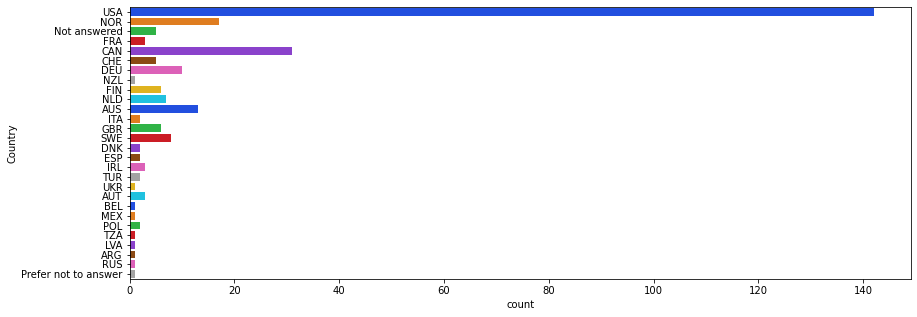

In [22]:
plt.figure(figsize=(14,5))
sns.countplot(data=data, y='Country', orient='h', palette='bright')

In [ ]:
%pip install plotly

In [1]:
import plotly
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [8]:
plotly.__version__
# requires version >= 1.9.0

'4.14.3'

In [110]:
a = eje.to_frame()
b = a.drop(['Not answered', 'Prefer not to answer', 'USA',], axis=0)
b

,Country
CAN,31
NOR,17
AUS,13
DEU,10
SWE,8
NLD,7
FIN,6
GBR,6
CHE,5
IRL,3


In [122]:
data_countries = dict(type = 'choropleth',
                      colorscale='Plasma',
                      reversescale=True, 
                      locations = b.index,
                      locationmode = 'ISO-3',
                      z = b['Country'],
                      text = b['Country'],
                      colorbar = {'title': 'Demography of survey'}
                     )

layout = dict(title = 'Demography of survey',
             geo = dict(showframe = False,
                        projection = {'type': 'natural earth'} ))

In [123]:
chromap = go.Figure(data = [data_countries],
                    layout = layout)
iplot(chromap, validate=False)